In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',low_memory=False)

In [4]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [5]:
data.shape

(181691, 135)

In [6]:
column_list = data.columns.tolist()
column_list

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed',
       'Wounded','Target','extended','Group','Target_type','Weapon_type','Motive']]
pd.set_option('display.max_columns', None)

In [9]:
data.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target  extended  \
0     1.0      0.0             Julio Guzman         0   
1     0.0      0.0  Nadine Chaval, daughter         0   
2     1.0      0.0                 Employee         0   
3     NaN      NaN             U.S. Embassy         0   
4     NaN      NaN           U.S. Consulate         0   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181053 non-null  object 
 12  extended     181691 non-null  int64  
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 23.6+ MB


In [11]:
data.describe().T

count         mean            std           min          25%  \
Year       181691.0  2002.638997      13.259430  1.970000e+03  1991.000000   
Month      181691.0     6.467277       3.388303  0.000000e+00     4.000000   
Day        181691.0    15.505644       8.814045  0.000000e+00     8.000000   
latitude   177135.0    23.498343      18.569242 -5.315461e+01    11.510046   
longitude  177134.0  -458.695653  204778.988611 -8.618590e+07     4.545640   
Killed     171378.0     2.403272      11.545741  0.000000e+00     0.000000   
Wounded    165380.0     3.167668      35.949392  0.000000e+00     0.000000   
extended   181691.0     0.045346       0.208063  0.000000e+00     0.000000   

                   50%          75%          max  
Year       2009.000000  2014.000000  2017.000000  
Month         6.000000     9.000000    12.000000  
Day          15.000000    23.000000    31.000000  
latitude     31.467463    34.685087    74.633553  
longitude    43.246506    68.710327   179.366667  
Killed        0.000000     2.000000  1570.000000  
Wounded       0.000000     2.000000  8191.000000  
extended      0.000000     0.000000     1.000000

In [12]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
extended            0
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [13]:
dataf = data.loc[:, data.isnull().mean() < .7]

In [14]:
dataf.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target  extended  \
0     1.0      0.0             Julio Guzman         0   
1     0.0      0.0  Nadine Chaval, daughter         0   
2     1.0      0.0                 Employee         0   
3     NaN      NaN             U.S. Embassy         0   
4     NaN      NaN           U.S. Consulate         0   

                                Group                  Target_type Weapon_type  
0                              MANO-D  Private Citizens & Property     Unknown  
1  23rd of September Communist League      Government (Diplomatic)     Unknown  
2                             Unknown          Journalists & Media     Unknown  
3                             Unknown      Government (Diplomatic)  Explosives  
4                             Unknown      Government (Diplomatic)  Incendiary

In [15]:
year_attacks = dataf.groupby('Year').size().reset_index(name='count')

fig = px.line(year_attacks, x='Year', y='count',
              title='Number of Terrorist Activity Over Years',
              labels={'Year': 'Year', 'count': 'Number of Attacks'})

fig.update_layout(xaxis_title='Year', yaxis_title='Number of Attacks',
                  height=500, width=800)

fig.show()

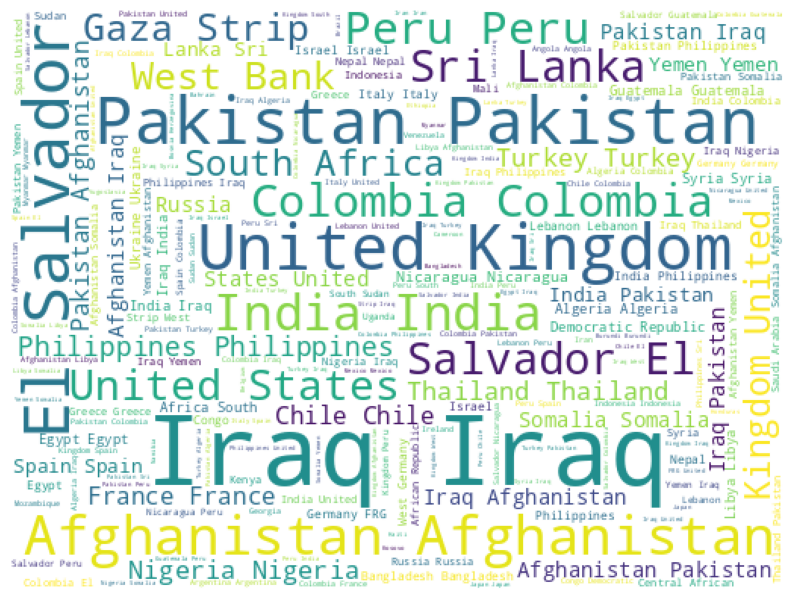

In [16]:
from wordcloud import WordCloud
from scipy import signal
cities = dataf.Country.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
count_by_year = dataf['Year'].value_counts().reset_index()
count_by_year.columns = ['Year', 'Count']

fig = px.bar(count_by_year, x='Year', y='Count',
             labels={'Year': 'Year', 'Count': 'Number of Terrorists'},
             title='Number of Terrorists Each Year',
             color='Year')
fig.update_layout(xaxis={'categoryorder': 'total ascending'},
                  xaxis_title='Year',
                  yaxis_title='Number of Terrorists',
                  height=600, width=2000)

fig.show()

In [18]:
terror_region = pd.crosstab(dataf.Year, dataf.Region)
terror_region = terror_region.reset_index()
terror_region_melted = terror_region.melt(id_vars='Year', var_name='Region', value_name='Count')

fig = px.line(terror_region_melted, x='Year', y='Count', color='Region',
              labels={'Year': 'Year', 'Count': 'Terrorist Activity Count', 'Region': 'Region'},
              title='Terrorist Activity By Region')

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Terrorist Activity Count',
                  height=600, width=1200)

fig.show()

In [19]:
attack_type_counts = dataf['AttackType'].value_counts()


fig = px.bar(x=attack_type_counts.index, y=attack_type_counts.values, title='Types of Attack')
fig.update_xaxes(title='Attack Type', categoryorder='total descending')
fig.update_yaxes(title='Count')
fig.update_layout(xaxis_tickangle=-45, bargap=0.2, height=500, width=800)
fig.show()

In [20]:
weapon_type_counts = dataf['Weapon_type'].value_counts()

colors = ['#FF5733', '#33FF57', '#3366FF', '#FFFF33', '#33FFFF']

fig = go.Figure([go.Bar(x=weapon_type_counts.index, y=weapon_type_counts.values, marker=dict(color=colors))])

fig.update_layout(
    title='Types of Weapon',
    xaxis=dict(title='Weapon Type', tickangle=-45),
    yaxis=dict(title='Count'),
    bargap=0.2,
    height=600,
    width=800
)

fig.show()

In [21]:
top_target_types = dataf['Target_type'].value_counts()[:10]

fig = px.bar(
    y=top_target_types.index[::-1],
    x=top_target_types.values[::-1],
    orientation='h',
    title='Top Target Type',
    labels={'x': 'Count', 'y': 'Target Type'},
    color=top_target_types.values[::-1],
    color_continuous_scale='Viridis'
)

fig.update_layout(height=500, width=800)

fig.show()

In [22]:
top_groups = dataf['Group'].value_counts()[1:16]

fig = px.bar(
    y=top_groups.index[::-1],
    x=top_groups.values[::-1],
    orientation='h',
    title='Groups with Highest Terror Attacks',
    labels={'x': 'Count', 'y': 'Group'},
    color=top_groups.values[::-1],
    color_continuous_scale='Blues'
)

fig.update_layout(height=600, width=900)

fig.show()


In [23]:
top_countries = dataf['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Attacks_Counts']

fig = px.bar(top_countries, x='Country', y='Attacks_Counts',
             title='Top Countries Affected',
             labels={'Country': 'Countries', 'Attacks_Counts': 'Count'},
             color='Country')

fig.update_layout(xaxis_title='Countries', yaxis_title='Count',
                  xaxis={'categoryorder':'total descending'},
                  height=500, width=800)

fig.show()

In [24]:
top_groups_10 = dataf[dataf['Group'].isin(dataf['Group'].value_counts()[1:11].index)]

crosstab = pd.crosstab(top_groups_10['Year'], top_groups_10['Group'])
crosstab.reset_index(inplace=True)

fig = px.line(crosstab, x='Year', y=crosstab.columns[1:],
              title='Top 10 Groups with Most Incidents Over the Years')

fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Incidents'),
    height=600,
    width=1500
)

custom_colors = px.colors.sequential.Viridis[:10]

for i, group in enumerate(crosstab.columns[1:]):
    fig.data[i].line.color = custom_colors[i]

fig.show()

In [25]:
killed_per_region = dataf.groupby("Region")["Killed"].sum().reset_index()


fig_killed = px.bar(killed_per_region, x='Region', y='Killed',
                    title='People Killed in Each Region',
                    labels={'Region': 'Regions', 'Killed': 'Number of People Killed'},
                    color='Region')

fig_killed.update_layout(xaxis_title='Regions', yaxis_title='Number of People Killed',
                        xaxis={'categoryorder': 'total descending'},
                        height=500, width=800)

fig_killed.show()

In [26]:
wounded_per_region = dataf.groupby("Region")["Wounded"].sum().reset_index()

fig_wounded = px.bar(wounded_per_region, x='Region', y='Wounded',
                     title='People Wounded in Each Region',
                     labels={'Region': 'Regions', 'Wounded': 'Number of People Wounded'},
                     color='Region')

fig_wounded.update_layout(xaxis_title='Regions', yaxis_title='Number of People Wounded',
                          xaxis={'categoryorder': 'total descending'},
                          height=500, width=800)
fig_wounded.show()

In [27]:
top_groups = dataf['Group'].value_counts()[1:14].index
filtered_data = dataf[dataf['Group'].isin(top_groups)]

fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude',
                        hover_name='Group', color='Group',
                        title='Regional Activities of Terrorist Groups',
                        zoom=1, height=800)

fig.update_layout(mapbox_style="carto-positron")
fig.update_geos(projection_type="orthographic")
fig.update_traces(marker=dict(size=10, opacity=0.5))

fig.show(renderer="notebook")